    __plt__>__plt2vv__ at line 501 column 10
    __plt__>__plt2__ at line 247 column 14
    __plt__ at line 114 column 16
    semilogy at line 65 column 10

    legend at line 306 column 8



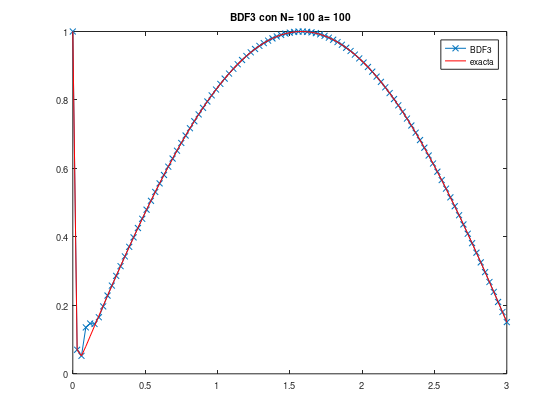

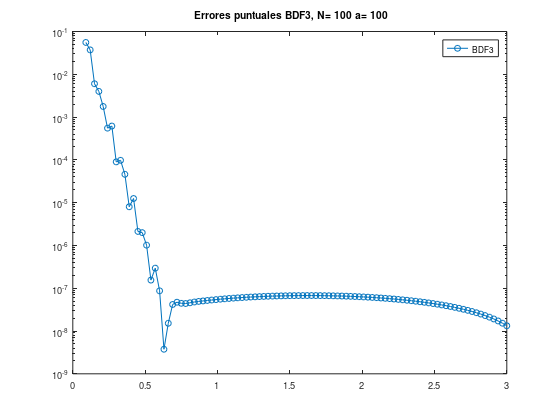

In [1]:

clear all;
%
% Uso del metodo BDF3 para la ecuacion de Dalhquist-Bjork
%
a=100;
t0=0; %Tiempo inicial
T=3;

N=100; % Numero de puntos maximo 
h=T/N;
% Vectores para BDF3
t=zeros(1,N+1);% dimensionaliza t
y=zeros(1,N+1);% dimensionaliza y 
yexact=zeros(1,N+1);% dimensionaliza yexact 



y0=1.0; %Dato inicial
%
% Datos iniciales
%
t(1)=0*h;
t(2)=1*h;
t(3)=2*h;
y(1)=DBsol(t(1),a,y0);
y(2)=DBsol(t(2),a,y0);
y(3)=DBsol(t(3),a,y0);
yexact(1)=y(1);
yexact(2)=y(2);
yexact(3)=y(3);


for n=3:N
    t(n+1)=n*h;
    y(n+1)=18/11*y(n)-9/11*y(n-1)+2/11*y(n-2)+6/11*h*a*sin(t(n+1));
    y(n+1)=y(n+1)/(1+6/11*h*a);
    yexact(n+1)=DBsol(t(n+1),a,y0);
end
figure(1);
plot(t,y,'x-',t,yexact,'r-');
legend('BDF3','exacta','Location','Best');
title([' BDF3 con N= ',num2str(N),' a= ',num2str(a)]);
%
% Calculo de los errores
%
errBDF3=abs(y-yexact);
figure(2);
semilogy(t,errBDF3,'o-');
legend('BDF3','Location','Best');
title([' Errores puntuales BDF3, N= ',num2str(N),' a= ',num2str(a)]);


Errores: N= 400 BDF3 = 0.037764 Orden 0.55493
Errores: N= 800 BDF3 = 0.013983 Orden 1.4333
Errores: N= 1600 BDF3 = 0.0030192 Orden 2.2114
Errores: N= 3200 BDF3 = 0.00048566 Orden 2.6361
Errores: N= 6400 BDF3 = 6.7861e-05 Orden 2.8393
Errores: N= 12800 BDF3 = 9.0043e-06 Orden 2.9139
Errores: N= 25600 BDF3 = 1.1601e-06 Orden 2.9564
Errores: N= 51200 BDF3 = 1.4723e-07 Orden 2.9781
Errores: N= 102400 BDF3 = 1.8544e-08 Orden 2.989
Errores: N= 204800 BDF3 = 2.3269e-09 Orden 2.9945
Errores: N= 409600 BDF3 = 2.9147e-10 Orden 2.997
Errores: N= 819200 BDF3 = 3.6436e-11 Orden 2.9999
Errores: N= 1638400 BDF3 = 4.5934e-12 Orden 2.9877
Errores: N= 3276800 BDF3 = 7.1243e-13 Orden 2.6888


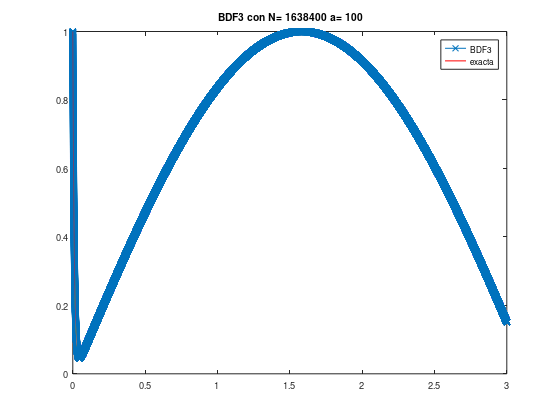

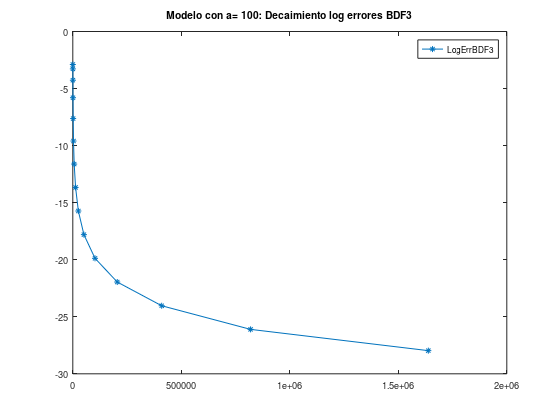

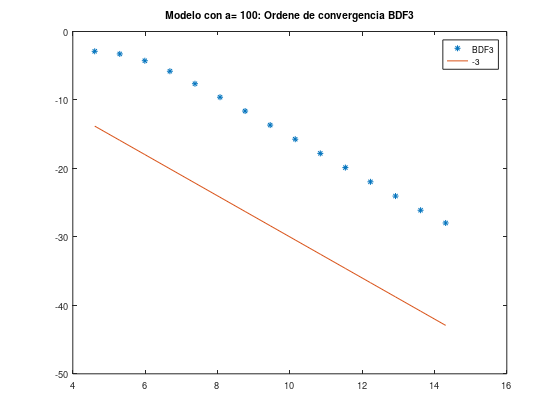

In [2]:
%
% estimamos el orden de convergencia con BDF3 
% usando las rectas de pendiente sobre el 
% problema de Dalhquist-Bjork
%
%Datos para la solucion exacta
%
a=100;
t0=0; %Tiempo inicial
tf=3;  %Tiempo final
T=tf-t0;% Tiempo total
y0=1; %Dato inicial
%
% Numero de calculos a realizar
%
M=15;
nP=zeros(1,M);% guarda el numero de puntos de la particion en cada calculo
errBDF3=zeros(1,M); %guarda el error obtenido con BDF3
%
% Numero de puntos iniciales
%
N=100;
for j=1:M  
    nP(j)=N;% Se guarda el numero de puntos a usar 
    h=T/N; % Talla de la particion
% Vectores para BDF3
    t=zeros(1,N+1);% dimensionaliza t
    y=zeros(1,N+1);% dimensionaliza y 
    yexact=zeros(1,N+1);% dimensionaliza yexact 
    %
    % Datos iniciales
    %
    t(1)=0;
    t(2)=h;
    t(3)=2*h;
    y(1)=DBsol(t(1),a,y0);
    y(2)=DBsol(t(2),a,y0);
    y(3)=DBsol(t(3),a,y0);
    yexact(1)=y(1);
    yexact(2)=y(2);
    yexact(3)=y(3);
    
for n=3:N
    t(n+1)=n*h;
    y(n+1)=18/11*y(n)-9/11*y(n-1)+2/11*y(n-2)+6/11*h*a*sin(t(n+1));
    y(n+1)=y(n+1)/(1+6/11*h*a);
    yexact(n+1)=DBsol(t(n+1),a,y0);
end 
figure(1);
plot(t,y,'x-',t,yexact,'r-');
legend('BDF3','exacta','Location','Best');
title([' BDF3 con N= ',num2str(N),' a= ',num2str(a)]);
%
errBDF3(j)=max(abs(yexact-y));
   pause(0.1); 
N=2*N; %duplicamos N
if (j>1)
   p= log(errBDF3(j-1)/errBDF3(j))/log(2);
disp(['Errores: N= ',num2str(N),' BDF3 = ',num2str(errBDF3(j)),' Orden ',num2str(p)])
end
pause(0.1);
end
%
% Visualizamos ahora los datos globales del calculo
%
figure(2)
plot(nP,log(errBDF3),'-*');
legend('LogErrBDF3','Location','Best');
title([' Modelo con a= ',num2str(a),...
       ': Decaimiento log errores BDF3 ']);
figure(3)
plot(log(nP),log(errBDF3),'*',log(nP),-3*log(nP),'-');
legend('BDF3','-3','Location','Best');
title([' Modelo con a= ',num2str(a),...
       ': Ordene de convergencia BDF3 ']);
   

Errores: N= 400 BDF3 = 5.3347 Orden 1.0845
Errores: N= 800 BDF3 = 1.7092 Orden 1.6421
Errores: N= 1600 BDF3 = 0.15919 Orden 3.4245
Errores: N= 3200 BDF3 = 0.017796 Orden 3.1612
Errores: N= 6400 BDF3 = 0.0021603 Orden 3.0422
Errores: N= 12800 BDF3 = 0.00026844 Orden 3.0086
Errores: N= 25600 BDF3 = 3.3525e-05 Orden 3.0013
Errores: N= 51200 BDF3 = 4.191e-06 Orden 2.9999
Errores: N= 102400 BDF3 = 5.2395e-07 Orden 2.9998
Errores: N= 204800 BDF3 = 6.5449e-08 Orden 3.001
Errores: N= 409600 BDF3 = 8.0763e-09 Orden 3.0186
Errores: N= 819200 BDF3 = 8.0064e-10 Orden 3.3345


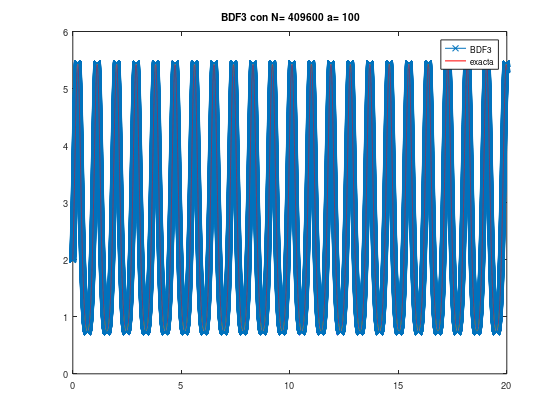

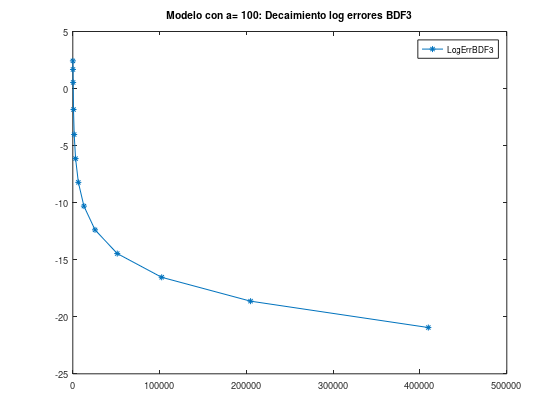

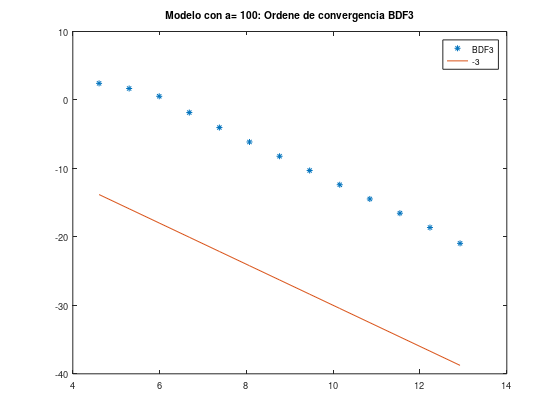

In [3]:
%
% estimamos el orden de convergencia con BDF3 
% usando las rectas de pendiente sobre el 
% problema y'=kk*cos(kk*t)*y que oscila periodicamente
% La solucion es 
%  y=y0*exp(sin(kk*t));
%
%Datos para la solucion exacta
t0=0; %Tiempo inicial
tf=20;  %Tiempo final
T=tf-t0;% Tiempo total
y0=2; %Dato inicial
%Datos para la solucion exacta
kk=7;

%
% Numero de calculos a realizar
%
M=13;
nP=zeros(1,M);% guarda el numero de puntos de la particion en cada calculo
errBDF3=zeros(1,M); %guarda el error obtenido con BDF3
%
% Numero de puntos iniciales
%
N=100;
for j=1:M  
    nP(j)=N;% Se guarda el numero de puntos a usar 
    h=T/N; % Talla de la particion
% Vectores para BDF3
    t=zeros(1,N+1);% dimensionaliza t
    y=zeros(1,N+1);% dimensionaliza y 
    yexact=zeros(1,N+1);% dimensionaliza yexact 
    %
    % Datos iniciales
    %
    t(1)=0;
    t(2)=h;
    t(3)=2*h;
    y(1)=y0*exp(sin(kk*t(1)));
    y(2)=y0*exp(sin(kk*t(2)));
    y(3)=y0*exp(sin(kk*t(3)));
    yexact(1)=y(1);
    yexact(2)=y(2);
    yexact(3)=y(3);
    
for n=3:N
    t(n+1)=n*h;
    y(n+1)=18/11*y(n)-9/11*y(n-1)+2/11*y(n-2);
    y(n+1)=y(n+1)/(1-6/11*h*kk*cos(kk*t(n+1)));
    yexact(n+1)=y0*exp(sin(kk*t(n+1)));
end 
figure(1);
plot(t,y,'x-',t,yexact,'r-');
legend('BDF3','exacta','Location','Best');
title([' BDF3 con N= ',num2str(N),' a= ',num2str(a)]);
%
errBDF3(j)=max(abs(yexact-y));
   pause(0.1); 
N=2*N; %duplicamos N
if (j>1)
   p= log(errBDF3(j-1)/errBDF3(j))/log(2);
disp(['Errores: N= ',num2str(N),' BDF3 = ',num2str(errBDF3(j)),' Orden ',num2str(p)])
end
pause(0.1);
end
%
% Visualizamos ahora los datos globales del calculo
%
figure(2)
plot(nP,log(errBDF3),'-*');
legend('LogErrBDF3','Location','Best');
title([' Modelo con a= ',num2str(a),...
       ': Decaimiento log errores BDF3 ']);
figure(3)
plot(log(nP),log(errBDF3),'*',log(nP),-3*log(nP),'-');
legend('BDF3','-3','Location','Best');
title([' Modelo con a= ',num2str(a),...
       ': Ordene de convergencia BDF3 ']);
   